# Nonlinear Poisson equation

$$-div(q(u)*\Delta(u)) = 0,$$
$$u = 0\text{ at }x=0, u=1\text{ at }x=1$$
$$q(u) = (1+u)^m$$

Solution method: Picard iteration (successive substitutions).

Picard iteration is a simple and widely used technique for solving nonlinear equations. It is based on the idea of reformulating the original equation as a fixed-point problem. The method involves iteratively updating the solution until it converges to the desired solution.


In [116]:
from dolfin import *
import numpy

mesh = IntervalMesh(40, 0, 1)
V = FunctionSpace(mesh, 'Lagrange', 1)

In [117]:
# Define boundary conditions

tol = 1E-14


left_boundary = CompiledSubDomain("on_boundary && near(x[0],0)")
right_boundary = CompiledSubDomain("on_boundary && near(x[0],1)")


bc_0 = DirichletBC(V, Constant(0.0), left_boundary)
bc_1 = DirichletBC(V, Constant(1.0), right_boundary)
bcs = [bc_0, bc_1]

In [118]:
m = 5


def q(u):
    return (1+u)**m


# Define variational problem for Picard iteration
u = TrialFunction(V)
v = TestFunction(V)
u_k = interpolate(Constant(0.0), V)  # previous (known) u


In [ ]:
a = inner(q(u_k)*nabla_grad(u), nabla_grad(v))*dx
f = Constant(0.0)
L = f*v*dx

Absolute tolerance and relative tolerance are two different concepts used to define the acceptable level of error or difference between two values when comparing them, especially in numerical computations, algorithms, and simulations.

1. Absolute Tolerance:
Absolute tolerance is a fixed value that represents the maximum allowable difference between two values. It is independent of the magnitude or scale of the values being compared. If the absolute difference between the two values is smaller than the absolute tolerance, they are considered to be equal or within the acceptable range.

1. Relative Tolerance:
Relative tolerance, on the other hand, takes into account the magnitude or scale of the values being compared. It defines an acceptable percentage or fraction of relative difference between two values. 

The idea is that the relative tolerance allows for more significant differences between large values and smaller differences between small values. This is especially useful when dealing with numbers of varying magnitudes.

In summary, absolute tolerance is a fixed value used to check the maximum allowable difference, while relative tolerance is a percentage or fraction-based value that scales with the magnitude of the numbers being compared. Depending on the situation and the nature of the values being compared, one or both types of tolerances may be used to ensure accurate and meaningful comparisons.

In [ ]:

# Picard iterations
u = Function(V)     # new unknown function
absolute_error = 1.0           # error measure ||u-u_k||
relative_error = 1.0
absolute_tolerance = 1.0E-5        # tolerance
relative_tolerance = 1.0E-5
iter = 0            # iteration counter
maxiter = 25        # max no of iterations allowed

In [119]:
while (absolute_error > absolute_tolerance or relative_error > relative_tolerance) and iter < maxiter:
    iter += 1
    solve(a == L, u, bcs)
    diff = u.vector().vec().array - u_k.vector().vec().array
    absolute_error = numpy.linalg.norm(diff)
    if iter > 1:
        relative_error = absolute_error / \
            min(numpy.linalg.norm(u.vector()[:]),
                numpy.linalg.norm(u_k.vector()[:]))
    print('iter ={0:3d}, absolute_error = {1:5.2e}, relative_error = {2:5.2e}'.format(
        iter, absolute_error, relative_error))
    u_k.assign(u)   # update for next iteration

iter =  1, absolute_error = 3.72e+00, relative_error = 1.00e+00
iter =  2, absolute_error = 1.79e+00, relative_error = 4.80e-01
iter =  3, absolute_error = 3.56e-01, relative_error = 7.04e-02
iter =  4, absolute_error = 3.64e-01, relative_error = 7.60e-02
iter =  5, absolute_error = 9.05e-02, relative_error = 1.89e-02
iter =  6, absolute_error = 9.63e-02, relative_error = 1.99e-02
iter =  7, absolute_error = 2.93e-02, relative_error = 6.01e-03
iter =  8, absolute_error = 2.47e-02, relative_error = 5.07e-03
iter =  9, absolute_error = 1.00e-02, relative_error = 2.06e-03
iter = 10, absolute_error = 5.94e-03, relative_error = 1.22e-03
iter = 11, absolute_error = 3.27e-03, relative_error = 6.73e-04
iter = 12, absolute_error = 1.36e-03, relative_error = 2.80e-04
iter = 13, absolute_error = 1.01e-03, relative_error = 2.08e-04
iter = 14, absolute_error = 3.06e-04, relative_error = 6.28e-05
iter = 15, absolute_error = 2.97e-04, relative_error = 6.09e-05
iter = 16, absolute_error = 7.57e-05, re

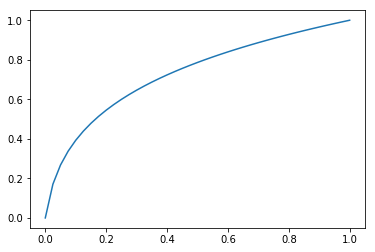

In [120]:
plot(u_k)

In [121]:
# Find max error
u_exact = Expression(
    'pow((pow(2, m+1)-1)*x[0] + 1, 1.0/(m+1)) - 1', m=m, degree=1)
u_e = interpolate(u_exact, V)
diff = numpy.abs(u_e.vector()[:] - u.vector()[:]).max()
print('Max error:{0:5.3e}'.format(diff))

Max error:1.208e-06
